Install dependencies

In [1]:
!pip3 install torch torchvision torchaudio
!pip3 install matplotlib
!pip3 install ultralytics roboflow

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


Start the training

In [2]:
import torch
from ultralytics import YOLO
from pathlib import Path
import os
import json
import yaml
import pandas as pd
import matplotlib.pyplot as plt

In [3]:

device = "cuda:0" if torch.cuda.is_available() else "cpu"

print(f"Using device: {device} ({'GPU' if device != 'cpu' else 'CPU'})")


Using device: cuda:0 (GPU)


In [4]:

CONFIG = {
    'model': 'yolo11m.pt',  # Choose model size: n, s, m, l, x
    'data': 'datasets/dataset_v1/data.yaml',  
    'epochs': 40,
    'batch': 2 if device != 'cpu' else 4,  # Adjust batch size for CPU
    'imgsz': 640,
    'patience': 20,
    'device': device, 
}
os.environ["PYTORCH_CUDA_ALLOC_CONF"] = "expandable_segments:True"


In [5]:

save_dir = Path('runs/detect')
save_dir.mkdir(parents=True, exist_ok=True)

this_path = os.getcwd()

os.environ['ULTRALYTICS_CONFIG_DIR'] = this_path

data_file = f'{this_path}/{CONFIG['data']}'
with open(data_file, 'r') as f:
    data = yaml.safe_load(f)
    

data['train'] = f'{this_path}/{CONFIG['data'].rsplit('/', 1)[0]}/train/images'
data['val'] = f'{this_path}/{CONFIG['data'].rsplit('/', 1)[0]}/valid/images'
data['test'] = f'{this_path}/{CONFIG['data'].rsplit('/', 1)[0]}/test/images'

with open(data_file, 'w') as f:
    yaml.safe_dump(data, f)


In [6]:

model = YOLO(CONFIG['model'])

In [ ]:

results = model.train(
    data=CONFIG['data'],
    epochs=CONFIG['epochs'],
    batch=CONFIG['batch'],
    imgsz=CONFIG['imgsz'],
    patience=CONFIG['patience'],
    device=CONFIG['device'],
    
    verbose=True,
    
    optimizer='SGD',
    lr0=0.001,
    lrf=0.005,
    momentum=0.9,
    weight_decay=0.0005,
    warmup_epochs=3,
    warmup_bias_lr=0.01,
    warmup_momentum=0.8,
    amp=False,
    
    # Augmentations
    augment=True,
    hsv_h=0.015,  # Image HSV-Hue augmentationc
    hsv_s=0.7,   # Image HSV-Saturation augmentation
    hsv_v=0.4,   # Image HSV-Value augmentation
    degrees=10,  # Image rotation (+/- deg)
    translate=0.1,  # Image translation (+/- fraction)
    scale=0.3,   # Image scale (+/- gain)
    shear=0.0,   # Image shear (+/- deg)
    perspective=0.0,  # Image perspective
    flipud=0.1,  # Image flip up-down
    fliplr=0.1,  # Image flip left-right
    mosaic=1.0,  # Image mosaic
    mixup=0.0,   # Image mixup
    
)


New https://pypi.org/project/ultralytics/8.3.35 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.34 🚀 Python-3.12.7 torch-2.5.1+cu124 CUDA:0 (NVIDIA GeForce GTX 1650, 3721MiB)
engine/trainer: task=detect, mode=train, model=yolo11m.pt, data=datasets/dataset_v1/data.yaml, epochs=40, time=None, patience=20, batch=2, imgsz=640, save=True, save_period=-1, cache=False, device=cuda:0, workers=8, project=None, name=train7, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=False, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=True, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=Fa

train: Scanning /var/home/larizmen/DATA/REPOS/ai-apps/dev/safety-hat/datasets/dataset_v1/train/labels.cache... 1191 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1191/1191 [00:00<?, ?it/s]
val: Scanning /var/home/larizmen/DATA/REPOS/ai-apps/dev/safety-hat/datasets/dataset_v1/valid/labels.cache... 90 images, 0 backgrounds, 0 corrupt: 100%|██████████| 90/90 [00:00<?, ?it/s]


Plotting labels to runs/detect/train7/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.001' and 'momentum=0.9' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000714, momentum=0.9) with parameter groups 106 weight(decay=0.0), 113 weight(decay=0.0005), 112 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/train7
Starting training for 40 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/40      2.44G      1.904      2.886      1.935          3        640: 100%|██████████| 596/596 [05:33<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:06<00:00,  3.33it/s]

                   all         90        635      0.547      0.269      0.263     0.0997



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/40      2.45G      1.921       2.55      1.973          3        640: 100%|██████████| 596/596 [05:45<00:00,  1.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:06<00:00,  3.54it/s]

                   all         90        635      0.533      0.259      0.215     0.0782



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/40      2.45G      1.967      2.621      2.031         22        640: 100%|██████████| 596/596 [05:43<00:00,  1.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:07<00:00,  3.15it/s]


                   all         90        635       0.32      0.245      0.215     0.0651

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/40      2.45G      1.931      2.566      2.001         36        640: 100%|██████████| 596/596 [05:51<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:06<00:00,  3.36it/s]

                   all         90        635      0.459      0.316      0.316      0.129



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/40      2.45G       1.92      2.536      2.008          8        640: 100%|██████████| 596/596 [05:43<00:00,  1.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:06<00:00,  3.49it/s]


                   all         90        635      0.534      0.333      0.328      0.125

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/40      2.45G      1.858      2.339      1.938          9        640: 100%|██████████| 596/596 [05:45<00:00,  1.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:06<00:00,  3.52it/s]

                   all         90        635      0.476      0.345      0.351      0.134



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/40      2.45G      1.816       2.28      1.909          2        640: 100%|██████████| 596/596 [05:45<00:00,  1.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:06<00:00,  3.39it/s]

                   all         90        635      0.462      0.374      0.384      0.147



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/40      2.45G      1.817      2.248      1.892         18        640: 100%|██████████| 596/596 [05:48<00:00,  1.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:06<00:00,  3.42it/s]

                   all         90        635      0.517      0.406      0.414      0.138



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/40      2.45G      1.799      2.158      1.895          7        640: 100%|██████████| 596/596 [05:49<00:00,  1.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:06<00:00,  3.31it/s]


                   all         90        635      0.445      0.382      0.373      0.129

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/40      2.42G      1.748       2.04      1.851         36        640: 100%|██████████| 596/596 [05:51<00:00,  1.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:06<00:00,  3.37it/s]


                   all         90        635      0.537      0.418      0.404      0.165

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/40       2.4G      1.644      1.931      1.949         16        640:   1%|          | 7/596 [00:04<06:37,  1.48it/s]


KeyboardInterrupt: 

All expected metrics are present.


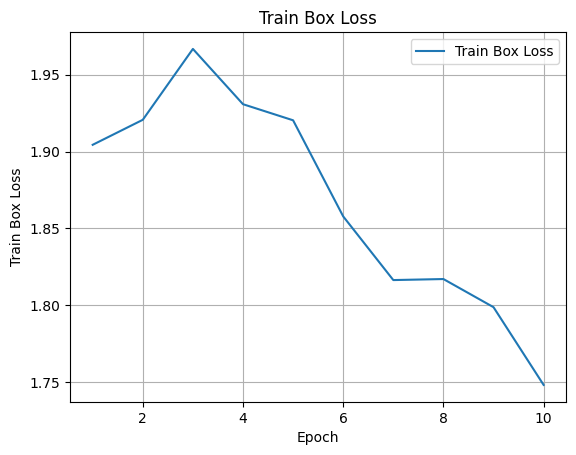

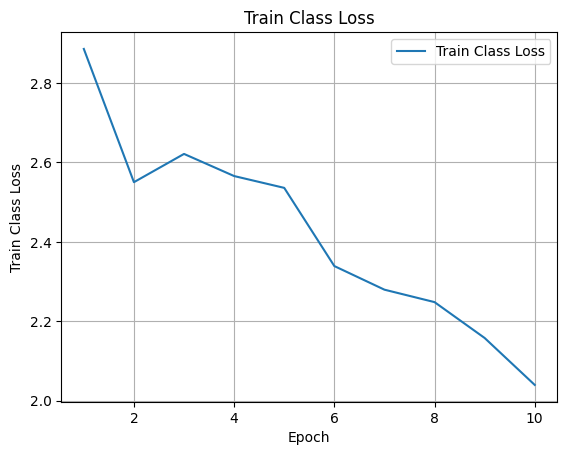

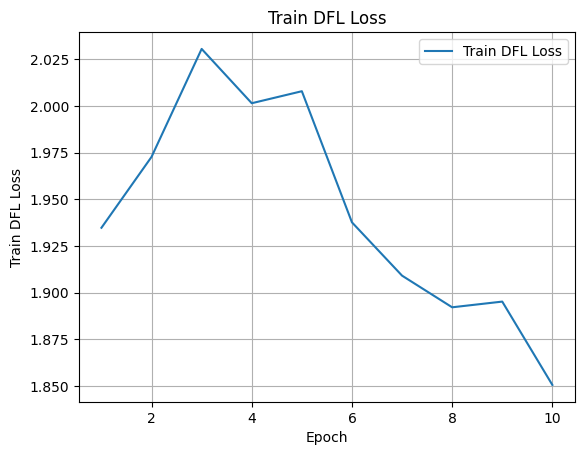

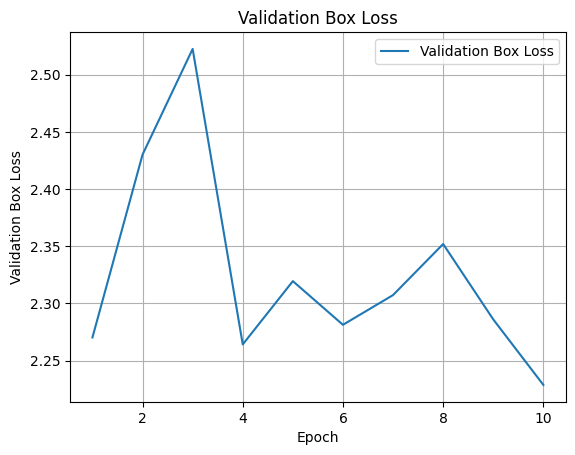

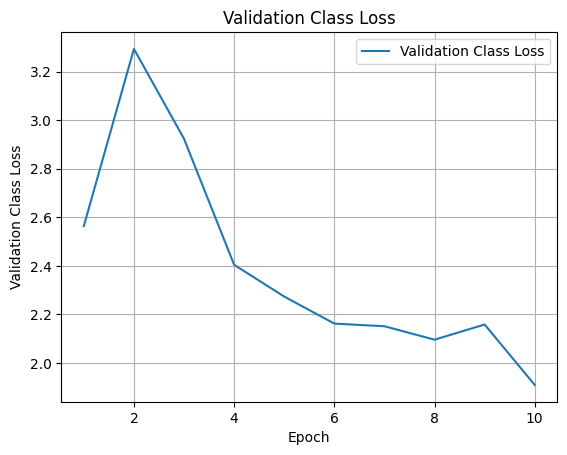

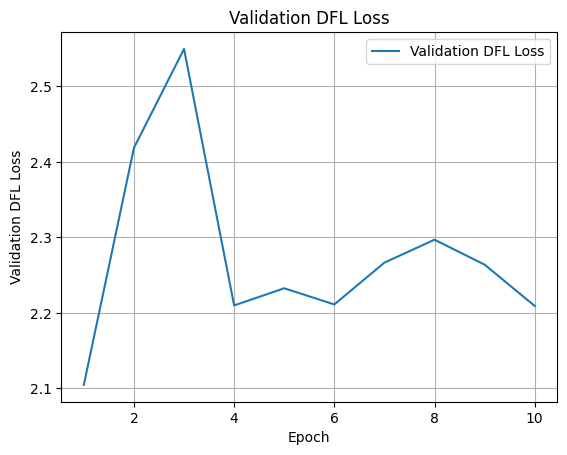

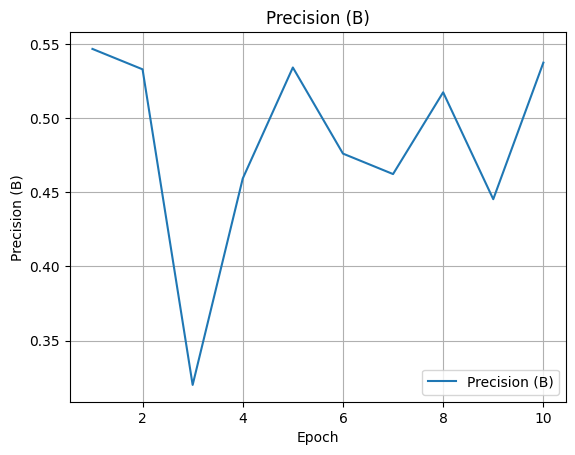

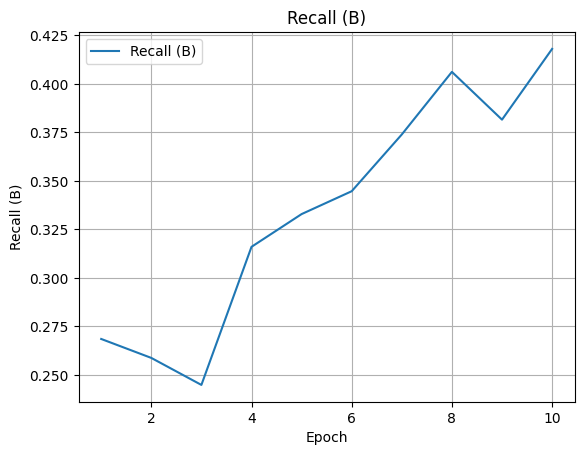

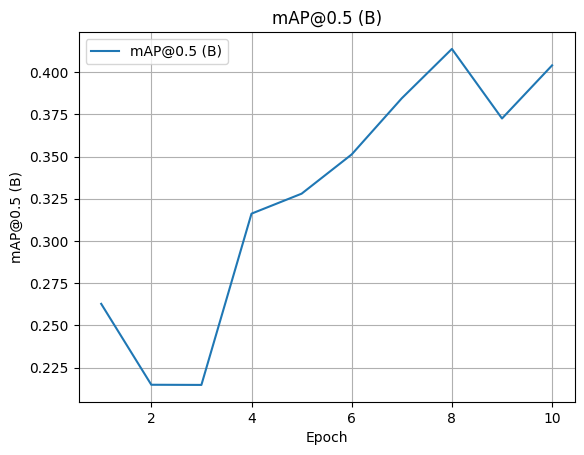

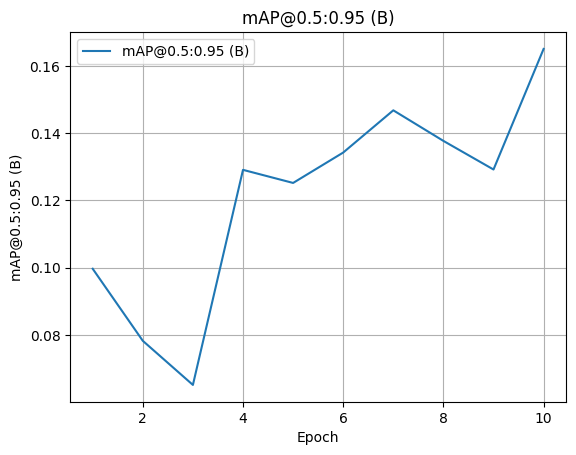


Final Metrics Summary (Last Epoch):
Train Box Loss: 1.7484
Train Class Loss: 2.0398
Train DFL Loss: 1.8506
Validation Box Loss: 2.2287
Validation Class Loss: 1.9093
Validation DFL Loss: 2.2092
Precision (B): 0.5373
Recall (B): 0.4180
mAP@0.5 (B): 0.4040
mAP@0.5:0.95 (B): 0.1651

Improvement Trends:
Train Box Loss: improved (Initial: 1.9044, Final: 1.7484)
Train Class Loss: improved (Initial: 2.8855, Final: 2.0398)
Train DFL Loss: improved (Initial: 1.9348, Final: 1.8506)
Validation Box Loss: improved (Initial: 2.2702, Final: 2.2287)
Validation Class Loss: improved (Initial: 2.5639, Final: 1.9093)
Validation DFL Loss: worsened (Initial: 2.1047, Final: 2.2092)
Precision (B): improved (Initial: 0.5466, Final: 0.5373)
Recall (B): worsened (Initial: 0.2685, Final: 0.4180)
mAP@0.5 (B): worsened (Initial: 0.2628, Final: 0.4040)
mAP@0.5:0.95 (B): worsened (Initial: 0.0997, Final: 0.1651)


In [ ]:

#file_path = f"{results['save_dir']}/results.csv"  
file_path = "/home/larizmen/DATA/REPOS/ai-apps/dev/safety-hat/runs/detect/train7/results.csv"


try:
    result_metrics = pd.read_csv(file_path)
except FileNotFoundError:
    print(f"File not found: {file_path}")
    exit()


# Define key metrics to analyze
metrics = {
    "Train Box Loss": "train/box_loss",
    "Train Class Loss": "train/cls_loss",
    "Train DFL Loss": "train/dfl_loss",
    "Validation Box Loss": "val/box_loss",
    "Validation Class Loss": "val/cls_loss",
    "Validation DFL Loss": "val/dfl_loss",
    "Precision (B)": "metrics/precision(B)",
    "Recall (B)": "metrics/recall(B)",
    "mAP@0.5 (B)": "metrics/mAP50(B)",
    "mAP@0.5:0.95 (B)": "metrics/mAP50-95(B)",
}

# Ensure the required metrics are available in the CSV
available_metrics = {name: col for name, col in metrics.items() if col in result_metrics.columns}
missing_metrics = [name for name in metrics if name not in available_metrics]

if missing_metrics:
    print(f"Missing metrics: {', '.join(missing_metrics)}")
else:
    print("All expected metrics are present.")

# Plot each metric over epochs
for metric_name, col in available_metrics.items():
    plt.figure()
    plt.plot(result_metrics["epoch"], result_metrics[col], label=metric_name)
    plt.title(metric_name)
    plt.xlabel("Epoch")
    plt.ylabel(metric_name)
    plt.legend()
    plt.grid()
    plt.show()

# Generate a summary of the final epoch metrics
final_epoch = result_metrics.iloc[-1]
final_metrics = {name: final_epoch[col] for name, col in available_metrics.items()}

print("\nFinal Metrics Summary (Last Epoch):")
for name, value in final_metrics.items():
    print(f"{name}: {value:.4f}")

# Highlight key trends (e.g., improvement over epochs)
print("\nImprovement Trends:")
for metric_name, col in available_metrics.items():
    initial = result_metrics[col].iloc[0]
    final = result_metrics[col].iloc[-1]
    trend = "improved" if final < initial else "worsened"
    print(f"{metric_name}: {trend} (Initial: {initial:.4f}, Final: {final:.4f})")
